In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib.markers import MarkerStyle
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

In [8]:
#We prepare a dataframe of all our filenames and a dataframe of all our csv's
csv_names = [filepath for filepath in os.listdir('ECO20-45mm/slopes-xt') if '.csv' in filepath]
filenamelist = pd.DataFrame().assign(name = csv_names)
df = [pd.read_csv(f'ECO20-45mm/slopes-xt/{f}') for f in filenamelist['name']]

In [9]:
f_lineal = lambda x,a,b: a*x + b

#Creating the colormap
norm_v = plt.Normalize(0.5,2.5)
cmap_v = plt.colormaps.get_cmap('plasma')
colorscale_v = plt.cm.ScalarMappable(norm_v, cmap_v)

norm_f = plt.Normalize(2,10)
cmap_f = plt.colormaps.get_cmap('viridis')
colorscale_f = plt.cm.ScalarMappable(norm_f, cmap_f)

freq_marker = MarkerStyle("o", fillstyle="left")
volt_marker = MarkerStyle("o", fillstyle="right")

currVolt_array = ['500mVpp','1,00Vpp','1,50Vpp','2,00Vpp','2,50Vpp'] #We create a volt tag array

### Pendiente en función de frecuencia

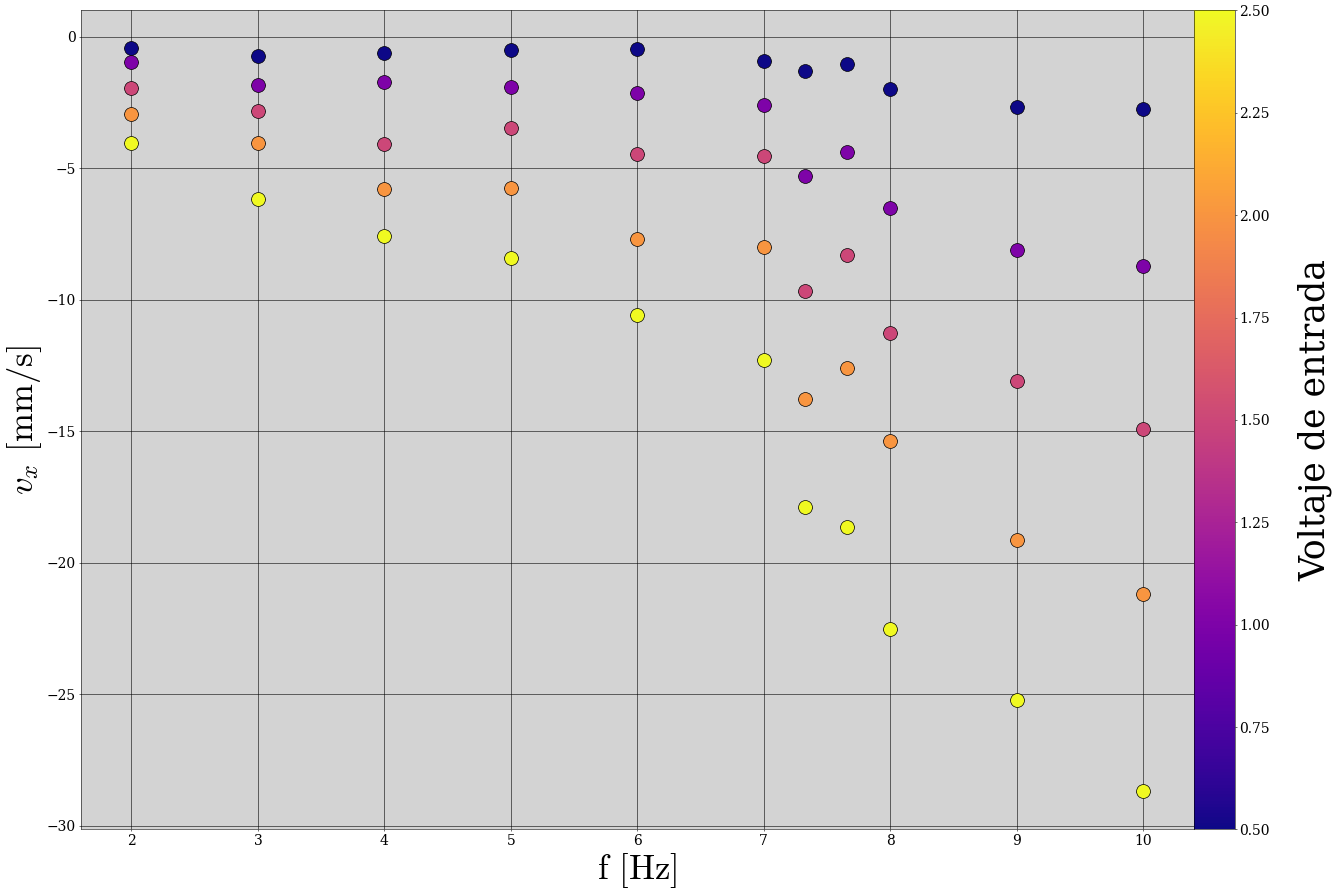

In [20]:
fig, ax = plt.subplots()

for currVolt in currVolt_array:

    df_namelist = filenamelist[filenamelist['name'].str.contains(currVolt)] #We get the filenames corresponding to the voltage chosen
    filtered_namelist = df_namelist['name'] #We get the names of those files


    for filename in filtered_namelist:
        
        df_txy = df[ df_namelist[df_namelist['name']==filename].index[0] ] #We retrieve the dataframe corresponding to our current filename
        
        #We retrieve the metadata of our measurements from the filename
        s = filename.split('.')[0].split('-')
        v,f = s[0],s[1]
        vval = (float(v.split('V')[0].replace(',','.')) if 'mV' not in v else float(v.split('mV')[0].replace(',','.'))*1e-3)
        fval = float(f.split('Hz')[0].replace(',','.'))
        
        #Setting colors for our datapoints
        freq_color = cmap_f(norm_f(fval))
        volt_color = cmap_v(norm_v(vval))
        
        #We retrieve the data from our dataframe
        t,x = df_txy['t'], df_txy['x']
        
        popt, popv = curve_fit(f_lineal, t, x)
        
        err_popt = np.sqrt(np.diag(popv))
        # print(f' {v}-{f} => parametros: {popt[0]}, {popt[1]} ; errores: {err_popt[0]}, {err_popt[1]} ')
        
        # Plotting
        ax.errorbar(fval, popt[0], markerfacecolor = volt_color, fmt='o',
                    yerr = err_popt[0], xerr = None, color = 'k', ecolor = 'k',
                    ms=20, elinewidth=2, lw=3, capsize=10)
    ax.plot(fval, popt[0], color = volt_color)
        # ax.errorbar(vval, popt[0], markerfacecolor = freq_color, fmt='o',
        #         yerr = err_popt[0], xerr = None, color = 'k', ecolor = 'k',
        #         ms=20, elinewidth=2, lw=3, capsize=10)

        
# Colorbar configuration

cbar_term = fig.colorbar(colorscale_v, ax=ax, location='right', orientation='vertical', pad=0)
cbar_term.ax.set_ylim(0.5,2.5)
cbar_term.ax.ticklabel_format(axis='x',style='sci',scilimits=(0,2))
cbar_term.ax.set_ylabel('Voltaje de entrada',labelpad=40)


# cbar_term = fig.colorbar(colorscale_f, ax=ax, location='right', orientation='vertical', pad=0)
# cbar_term.ax.set_ylim(2,10)
# cbar_term.ax.ticklabel_format(axis='x',style='sci',scilimits=(0,2))
# cbar_term.ax.set_ylabel('Frecuencia de forzado',labelpad=40)


#Axes configuration
ax.set_xlabel(f'$\\text{{f}}$ $[\\text{{Hz}}]$')
ax.set_ylabel(f'$v_x$ $[\\text{{mm/s}}]$')

fig.tight_layout()
# fig.savefig(f'pendiente-en-funcion-de-frecuencia.svg', bbox_inches='tight')
# fig.savefig(f'pendiente-en-funcion-de-frecuencia.png', bbox_inches='tight')

### Pendiente en función de voltaje

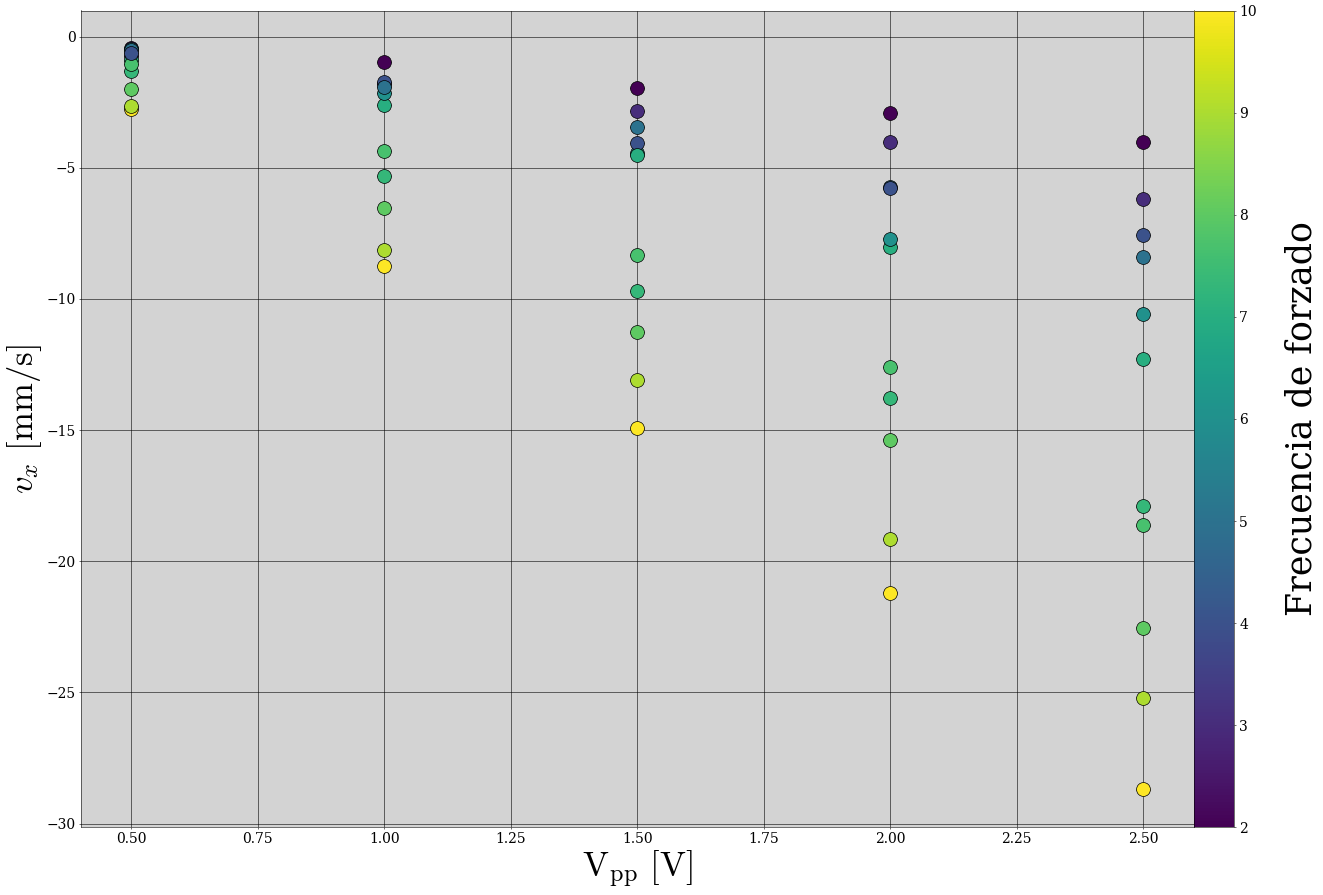

In [21]:
#We plot everything on the same two plots
fig, ax = plt.subplots()

for currVolt in currVolt_array:

    df_namelist = filenamelist[filenamelist['name'].str.contains(currVolt)] #We get the filenames corresponding to the frequency chosen
    filtered_namelist = df_namelist['name'] #We get the names of those files


    for filename in filtered_namelist:
        
        df_txy = df[ df_namelist[df_namelist['name']==filename].index[0] ] #We retrieve the dataframe corresponding to our current filename
        
        #We retrieve the metadata of our measurements from the filename
        s = filename.split('.')[0].split('-')
        v,f = s[0],s[1]
        vval = (float(v.split('V')[0].replace(',','.')) if 'mV' not in v else float(v.split('mV')[0].replace(',','.'))*1e-3)
        fval = float(f.split('Hz')[0].replace(',','.'))
        
        #Setting colors for our datapoints
        freq_color = cmap_f(norm_f(fval))
        volt_color = cmap_v(norm_v(vval))
        
        #We retrieve the data from our dataframe
        t,x = df_txy['t'], df_txy['x']
        
        popt, popv = curve_fit(f_lineal, t, x)
        
        err_popt = np.sqrt(np.diag(popv))
        ax.errorbar(vval, popt[0], markerfacecolor = freq_color, fmt='o',
                yerr = err_popt[0], xerr = None, color = 'k', ecolor = 'k',
                ms=20, elinewidth=2, lw=3, capsize=10)

cbar_term = fig.colorbar(colorscale_f, ax=ax, location='right', orientation='vertical', pad=0)
cbar_term.ax.set_ylim(2,10)
cbar_term.ax.ticklabel_format(axis='x',style='sci',scilimits=(0,2))
cbar_term.ax.set_ylabel('Frecuencia de forzado',labelpad=40)


#Axes configuration
ax.set_xlabel(f'$\\text{{V}}_{{\\text{{pp}}}}$ $[\\text{{V}}]$')
ax.set_ylabel(f'$v_x$ $[\\text{{mm/s}}]$')

fig.tight_layout()
# fig.savefig(f'pendiente-en-funcion-de-voltaje.svg', bbox_inches='tight')
# fig.savefig(f'pendiente-en-funcion-de-voltaje.png', bbox_inches='tight')

### Descarga de pendientes agrupado por voltaje y frecuencia

In [13]:
volt_freq_map = dict()

for currVolt in currVolt_array:

    df_namelist = filenamelist[filenamelist['name'].str.contains(currVolt)] #We get the filenames corresponding to the frequency chosen
    filtered_namelist = df_namelist['name'] #We get the names of those files


    for filename in filtered_namelist:
        
        df_txy = df[ df_namelist[df_namelist['name']==filename].index[0] ] #We retrieve the dataframe corresponding to our current filename
        
        #We retrieve the metadata of our measurements from the filename
        s = filename.split('.')[0].split('-')
        v,f = s[0],s[1]
        vval = (float(v.split('V')[0].replace(',','.')) if 'mV' not in v else float(v.split('mV')[0].replace(',','.'))*1e-3)
        fval = float(f.split('Hz')[0].replace(',','.'))
        
        #Setting colors for our datapoints
        freq_color = cmap_f(norm_f(fval))
        volt_color = cmap_v(norm_v(vval))
        
        #We retrieve the data from our dataframe
        t,x = df_txy['t'], df_txy['x']
        
        popt, popv = curve_fit(f_lineal, t, x)
        err_popt = np.sqrt(np.diag(popv))
        
        volt_freq_map[popt[0]] = (vval,fval)

pd.DataFrame(volt_freq_map.values(), index = volt_freq_map.keys(), columns=['voltage','frequency']).to_csv('slope-volt-freq-map.csv', index_label='slope')

### Pendientes agrupado por voltaje y frecuencia

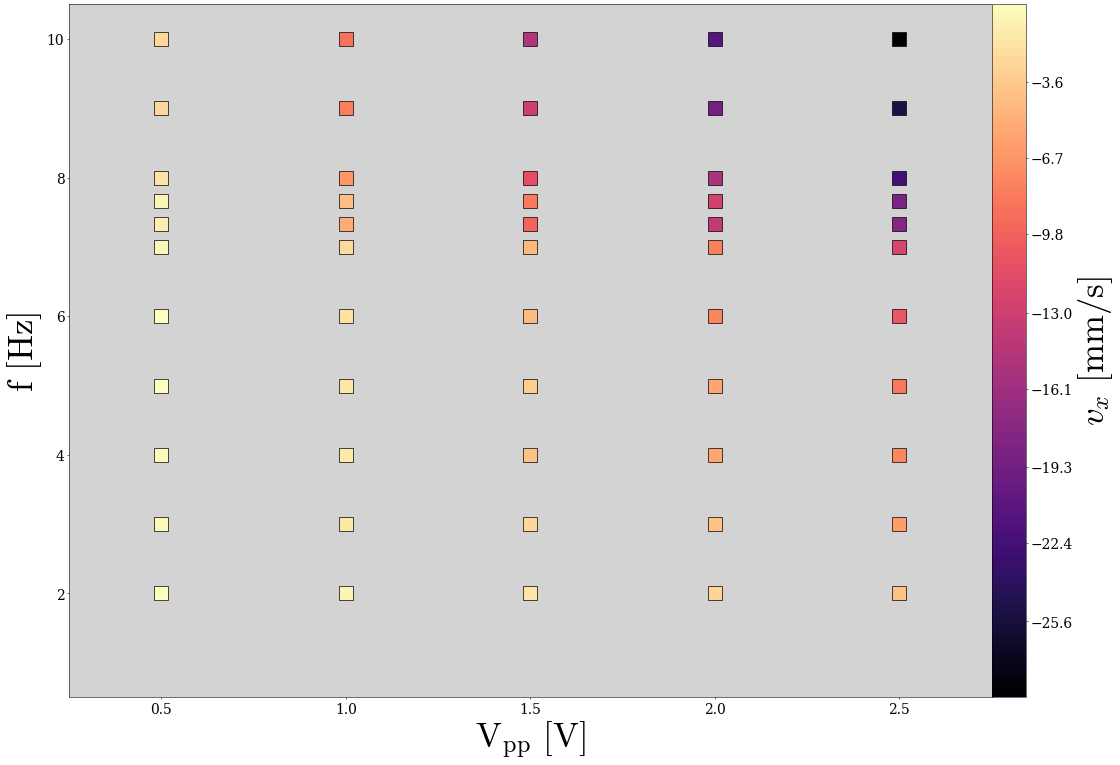

In [22]:
fig, ax = plt.subplots()

df_slopes = pd.read_csv('slope-volt-freq-map.csv')

min_slope = df_slopes['slope'].min()
max_slope = df_slopes['slope'].max()

norm = plt.Normalize(min_slope, max_slope)
cmap = plt.colormaps.get_cmap('magma')
colorscale = plt.cm.ScalarMappable(norm, cmap)


for s,v,f in df_slopes.values:
    slope_color = cmap(norm(s))
    ax.errorbar(v, f, markerfacecolor = slope_color, fmt='s',
        yerr = None, xerr = None, color = 'k', ecolor = 'k',
        ms=20, elinewidth=2, lw=3, capsize=10)

ax.set_ylim(0.5,10.5)
ax.set_xlim(0.25,2.75)

plt.colorbar(colorscale, ax=ax, location='right', orientation='vertical', pad=0,
            label = f'$v_x$ $[\\text{{mm/s}}]$',
            ticks = np.round(np.linspace(min_slope, max_slope, 10),1)
        )

ax.set_xlabel(f'$\\text{{V}}_{{\\text{{pp}}}}$ $[\\text{{V}}]$')
ax.set_ylabel(f'$\\text{{f}}$ $[\\text{{Hz}}]$')
ax.grid()